# Google Play Dataset And Findings

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## # Cleaning The Data Set and Getting Basic Information About Data Set:

#### (i) For Overview printing the first and last 10 Rows:

In [82]:
df=pd.read_csv('googleplaystore.csv')


print("First 10 Rows : \n",df.head(10).to_string(),"\n\n")
print("Last 10 Rows : \n",df.tail(10).to_string())

First 10 Rows : 
                                                   App        Category  Rating Reviews  Size     Installs  Type Price Content Rating                     Genres        Last Updated         Current Ver   Android Ver
0      Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1     159   19M      10,000+  Free     0       Everyone               Art & Design     January 7, 2018               1.0.0  4.0.3 and up
1                                 Coloring book moana  ART_AND_DESIGN     3.9     967   14M     500,000+  Free     0       Everyone  Art & Design;Pretend Play    January 15, 2018               2.0.0  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide Apps  ART_AND_DESIGN     4.7   87510  8.7M   5,000,000+  Free     0       Everyone               Art & Design      August 1, 2018               1.2.4  4.0.3 and up
3                               Sketch - Draw & Paint  ART_AND_DESIGN     4.5  215644   25M  50,000,000+  Free     0           Tee

In [83]:
df["Installs"] = df["Installs"].str.replace("+", "", regex=False)
df["Installs"] = df["Installs"].str.replace(",", "")
df["Installs"] = pd.to_numeric(df["Installs"], errors="coerce")

print("First 10 Rows : \n",df.head(10).to_string(),"\n\n")
print("Last 10 Rows : \n",df.tail(10).to_string())


First 10 Rows : 
                                                   App        Category  Rating Reviews  Size    Installs  Type Price Content Rating                     Genres        Last Updated         Current Ver   Android Ver
0      Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1     159   19M     10000.0  Free     0       Everyone               Art & Design     January 7, 2018               1.0.0  4.0.3 and up
1                                 Coloring book moana  ART_AND_DESIGN     3.9     967   14M    500000.0  Free     0       Everyone  Art & Design;Pretend Play    January 15, 2018               2.0.0  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide Apps  ART_AND_DESIGN     4.7   87510  8.7M   5000000.0  Free     0       Everyone               Art & Design      August 1, 2018               1.2.4  4.0.3 and up
3                               Sketch - Draw & Paint  ART_AND_DESIGN     4.5  215644   25M  50000000.0  Free     0           Teen    

#### (ii) Getting basic info:

In [84]:

df["Price"]=pd.to_numeric(df["Price"], errors='coerce')
df["Rating"]=pd.to_numeric(df["Rating"],errors='coerce')


print("\n\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10040 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


 None


In [85]:
print("\n\n", df.describe())



             Rating      Installs    Price
count  9367.000000  1.084000e+04  10040.0
mean      4.193338  1.546434e+07      0.0
std       0.537431  8.502936e+07      0.0
min       1.000000  0.000000e+00      0.0
25%       4.000000  1.000000e+03      0.0
50%       4.300000  1.000000e+05      0.0
75%       4.500000  5.000000e+06      0.0
max      19.000000  1.000000e+09      0.0


#### (iii) Printing every column name for understanding dataset:

In [86]:
print(df.columns)
print("\n\n\n", df.size)
print("\n\n\n", df.shape)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')



 140933



 (10841, 13)


#### (iv) Finding NaN values in each column:

In [87]:
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             1
Type                 1
Price              801
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


#### (v) deleting non necessary null values containing rows:
---> as some columns have only 1-10 null values hence removing/deleting them from dataset will not affect our finding much s

In [88]:
df.dropna(subset=["Type","Content Rating", "Current Ver", "Android Ver"],inplace=True)
print(df.isnull().sum())

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price              797
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64


----> but the "Rating" column have very large number of rows with null values so we cant delete them, hence replacing the null values with mean() of "Rating" column

In [109]:

df["Rating"]=df["Rating"].fillna(df["Rating"].mean())

df["Price"]=df["Price"].fillna(1)
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Size_MB           0
dtype: int64


#### (v) Finally we have almost done cleaning the dataset hence printing again to see cleaned dataset:

In [90]:
print("First 10 Rows : \n",df.head(10).to_string(),"\n\n")
print("Last 10 Rows : \n",df.tail(10).to_string())

First 10 Rows : 
                                                   App        Category  Rating Reviews  Size    Installs  Type  Price Content Rating                     Genres        Last Updated         Current Ver   Android Ver
0      Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1     159   19M     10000.0  Free    0.0       Everyone               Art & Design     January 7, 2018               1.0.0  4.0.3 and up
1                                 Coloring book moana  ART_AND_DESIGN     3.9     967   14M    500000.0  Free    0.0       Everyone  Art & Design;Pretend Play    January 15, 2018               2.0.0  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide Apps  ART_AND_DESIGN     4.7   87510  8.7M   5000000.0  Free    0.0       Everyone               Art & Design      August 1, 2018               1.2.4  4.0.3 and up
3                               Sketch - Draw & Paint  ART_AND_DESIGN     4.5  215644   25M  50000000.0  Free    0.0           Tee

# ANALYSIS:

## 1. Total Number of apps per category:

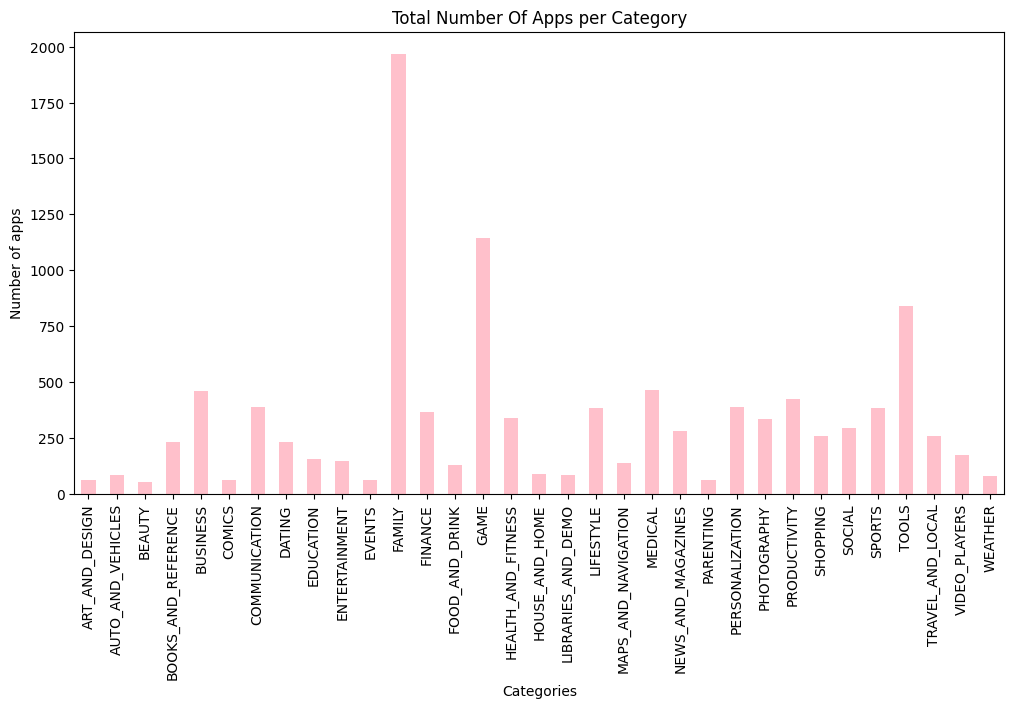

In [91]:
apps_category_group= df.groupby("Category")["App"].count()

plt.figure(figsize=(12,6))
apps_category_group.plot(kind="bar",color="pink")
plt.title("Total Number Of Apps per Category")
plt.xlabel("Categories")
plt.ylabel("Number of apps")
plt.show()

## ---> hence most number of apps are of category "FAMILY" followed by "GAME" and "Tools"

### (ii) Category with most and least number of apps:

In [92]:
print("The Category with least number of apps is",apps_category_group.idxmin(),"that is",apps_category_group.min(),"apps")
print("The Category with most number of apps is",apps_category_group.idxmax(),"that is",apps_category_group.max(),"apps")

# print(apps_category_group.to_string())

The Category with least number of apps is BEAUTY that is 53 apps
The Category with most number of apps is FAMILY that is 1968 apps


## 2. Free apps vs paid apps:

In [93]:
count_price=df.groupby("Type")["App"].count()
print(count_price)

Type
Free    10032
Paid      797
Name: App, dtype: int64


Text(0.5, 1.0, 'Pie Showing Free vs Paid apps')

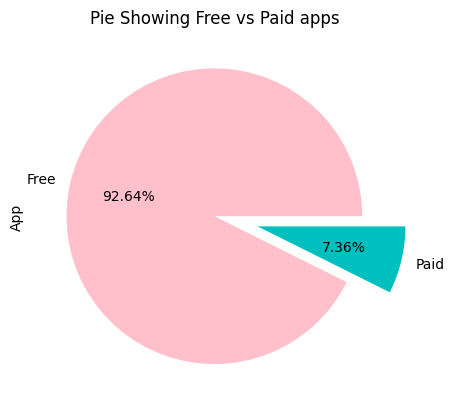

In [94]:
ex=[0.0,0.3]

count_price.plot(kind="pie",colors=["pink","c"],radius=1,autopct="%0.2f%%",explode=ex )
plt.title("Pie Showing Free vs Paid apps")

## 3. Most installed apps: top 10

In [112]:
most_installed_apps = df[["App", "Installs"]].sort_values("Installs", ascending=False).head(10)
print(most_installed_apps.to_string())

                                           App      Installs
391              Skype - free IM & video calls  1.000000e+09
1872                            Subway Surfers  1.000000e+09
4104  Messenger – Text and Video Chat for Free  1.000000e+09
3736                               Google News  1.000000e+09
3687                   Google Play Movies & TV  1.000000e+09
3665                                   YouTube  1.000000e+09
2611                                 Instagram  1.000000e+09
3565                              Google Drive  1.000000e+09
5395                             Google Photos  1.000000e+09
2604                                 Instagram  1.000000e+09


## 4. Average Rating of Top Categories

<Axes: xlabel='Category'>

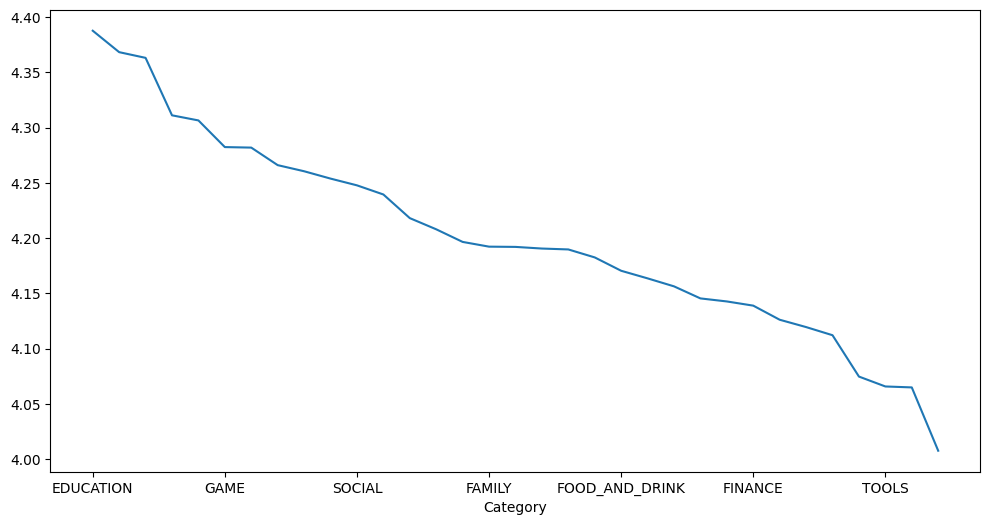

In [96]:
rating_per_category=df.groupby("Category")["Rating"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
rating_per_category.plot(kind="line")

## 5. (i) Most Installs Per Category:

Text(0, 0.5, 'Number of Installs (×10 Billion)')

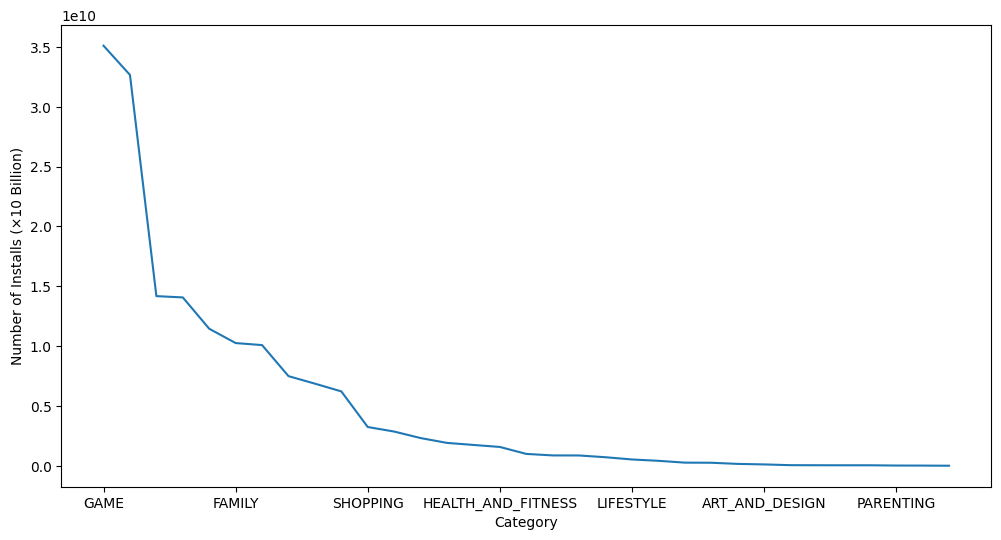

In [124]:
installs_per_category=df.groupby("Category")["Installs"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
installs_per_category.plot(kind="line")
plt.ylabel('Number of Installs (×10 Billion)')


### (ii) Installs vs ratings

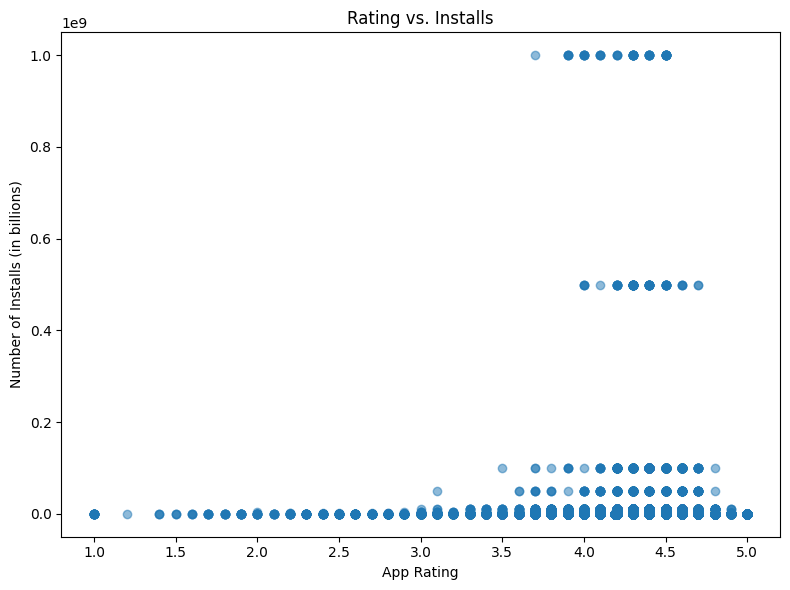

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(df['Rating'], df['Installs'], alpha=0.5)
plt.xlabel('App Rating')
plt.ylabel('Number of Installs (in billions)')
plt.title('Rating vs. Installs')
plt.tight_layout()
plt.show()

### (iii) top 10 highest rated apps:

In [99]:
top_rated_apps=df[["App","Rating","Category"]].sort_values(by="Rating",ascending=False).head(10)
print(top_rated_apps.to_string())

                              App  Rating             Category
7291                    CG Prints     5.0          PHOTOGRAPHY
5763   Tozer Devotional -Series 1     5.0  BOOKS_AND_REFERENCE
10611  Beacon Baptist Jupiter, FL     5.0            LIFESTYLE
6391        BK Arogyam Task Track     5.0             BUSINESS
6396                 Bk Usha behn     5.0            LIFESTYLE
7466                       211:CK     5.0                 GAME
6398                  BK Gold App     5.0              FINANCE
8234                   DB Pickles     5.0             BUSINESS
8230                      DB HOME     5.0            LIFESTYLE
9002                  DW Security     5.0             BUSINESS


## 6.App size Analysis:

#### first we have to clean the size column:

In [100]:
print(df.groupby("Size")["App"].count().to_string())

Size
1.0M                     7
1.1M                    32
1.2M                    41
1.3M                    35
1.4M                    37
1.5M                    48
1.6M                    39
1.7M                    40
1.8M                    50
1.9M                    32
10.0M                   10
100M                    16
1020k                    1
103k                     1
108k                     1
10M                    136
116k                     1
118k                     3
11M                    197
121k                     1
122k                     1
12M                    196
13M                    191
141k                     2
143k                     1
144k                     1
14M                    193
14k                      1
153k                     1
154k                     1
157k                     1
15M                    184
160k                     1
161k                     1
164k                     1
169k                     1
16M                    

#### hence we can see that the unit are either Million(M), Thousands(k) or "Varies With device", hence we have to replace the Million and thousands with exact numerical values, and the "varies with device" with nan 

In [101]:
df["Size"]=df["Size"].str.replace('M','000000')
df["Size"]=df["Size"].str.replace('k','000')
df["Size"]=df["Size"].str.replace(',','')
df["Size"]=df["Size"].str.replace('+','')


df["Size"]=df["Size"].replace('Varies with device',pd.NA)

df["Size"] = pd.to_numeric(df["Size"], errors="coerce")

In [102]:
# print(df.groupby("Size")["App"].count().sort_values(ascending=False).to_string())

df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1694
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [103]:
print(df["Size"].mean())
print(df["Size"].median())

19596052.952424742
13000000.0


In [104]:
df["Size"]=df["Size"].fillna(df["Size"].mean())
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

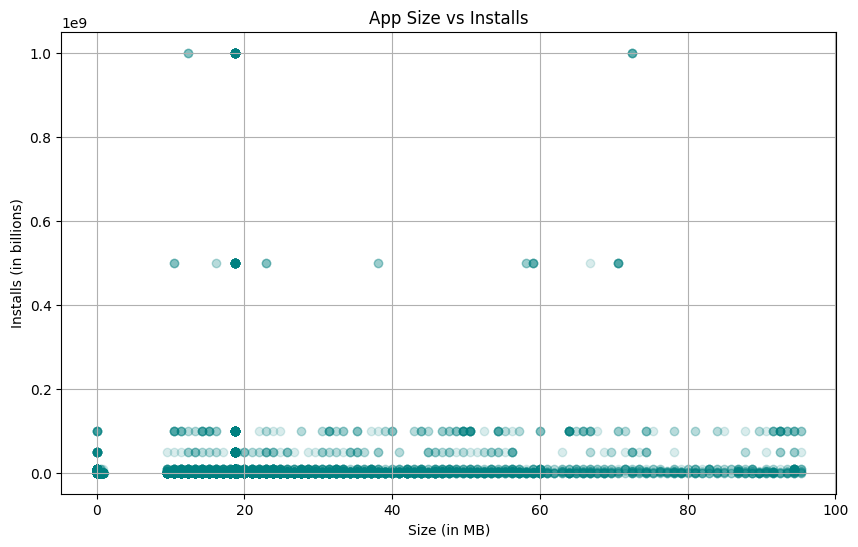

In [105]:
df['Size_MB'] = df['Size'] / (1024*1024)  # converting the size to mb


plt.figure(figsize=(10,6))

plt.scatter(df['Size_MB'], df['Installs'], alpha=0.15, color='teal')
plt.title('App Size vs Installs')
plt.xlabel('Size (in MB)')
plt.ylabel('Installs (in billions)')
plt.grid(True)
plt.show()

### (ii) Average size per category

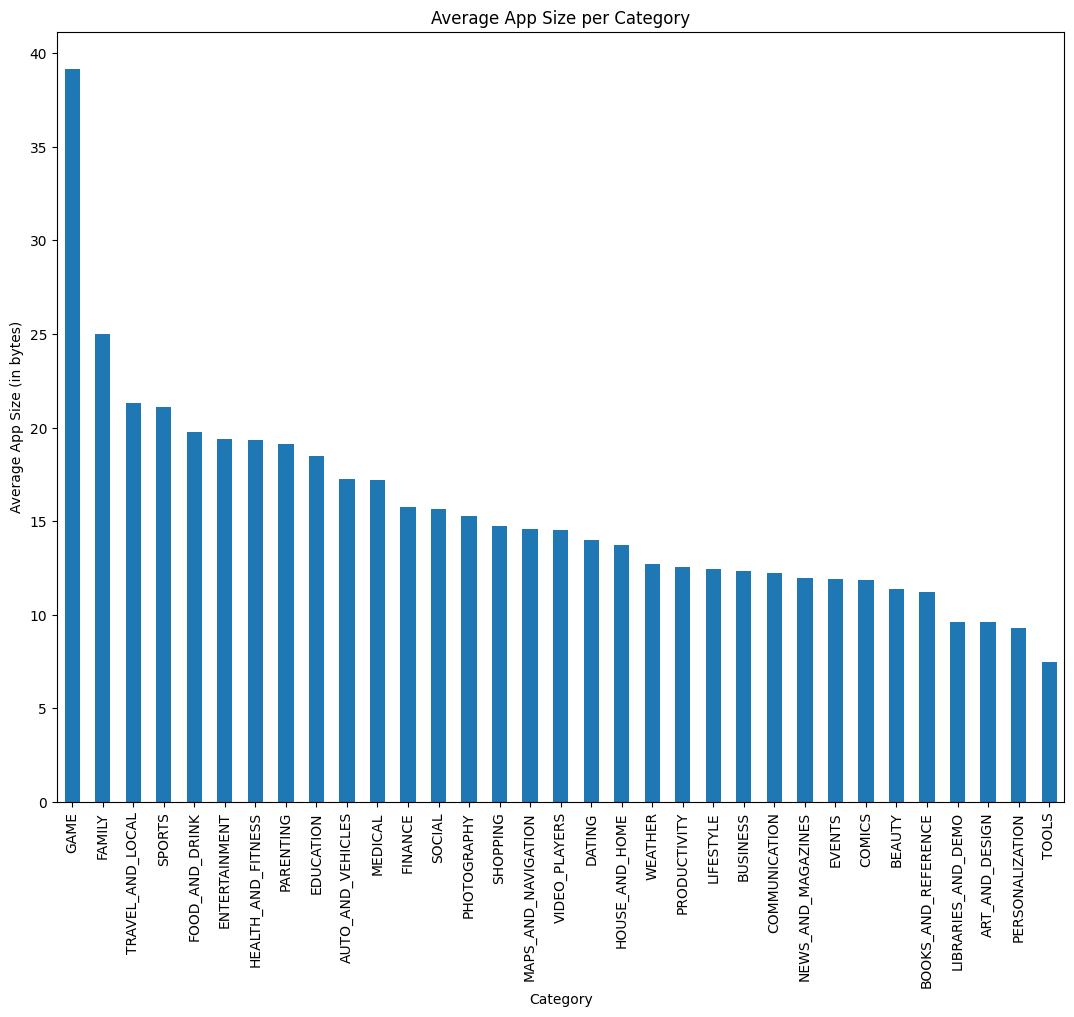

In [106]:
size_per_category = df.groupby("Category")["Size_MB"].mean().sort_values(ascending=False)
size_per_category.plot(kind="bar", figsize=(13,10))
plt.ylabel("Average App Size (in bytes)")
plt.title("Average App Size per Category")
plt.show()


### (iii) Top 10 Largest Apps by size:

In [107]:
top_largest_apps=df[["App", "Size_MB"]].sort_values(by="Size_MB", ascending=False).head(10)
print(top_largest_apps.to_string())

                                                   App    Size_MB
1758                            Hungry Shark Evolution  95.367432
1565                    Talking Babsy Baby: Baby Games  95.367432
1080                                         Post Bank  95.367432
8847                        Draft Simulator for FUT 18  95.367432
5427                                   Ultimate Tennis  95.367432
9170                     Stickman Legends: Shadow Wars  95.367432
8409  Car Crash III Beam DH Real Damage Simulator 2018  95.367432
2299                              Navi Radiography Pro  95.367432
4690                                        Vi Trainer  95.367432
5862                             Miami crime simulator  95.367432
